# Chapter 2: End-to-End ML Project

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

To import the data:

In [2]:
import os
import tarfile
import urllib

## Some definitions

- Data snooping bias: when the Data Scientist's brain unknowingly starts extracting patterns from the entire dataset, which leads to overfitting the test sample.

## Open datasets

Open data reports:
- UC Irvine ML repo
- Kaggle datasets
- AWS datasets

Meta portals, that list open data repositories:
- Data Portals
- OpenDataMonitor
- Quandl

Other listings
- Wikipedia's list of ML datasets
- Quora.com
- The datasets subreddit

## Download the Data

The dataset is the 1990 California Census Project. The objective is to predict median house prices.

In [3]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = os.path.join(DOWNLOAD_ROOT, HOUSING_PATH, "housing.tgz")

In [4]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    # create datasets/housing
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    # download tgz file (src, dest)
    urllib.request.urlretrieve(housing_url, tgz_path)
    # get tgz object
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

The tgz file contains a csv file, `housing.csv`. Load the data using pandas:

In [5]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

Run all:

In [6]:
fetch_housing_data()
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Total size: 20640. Some districts are missing their total bedrooms.

To analyse the categorical value `ocean_proximity`, we can use the `value_counts` method:

In [8]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Use `describe` to explore numerical fields. As in SQL, aggregates are computed only using non-missing values. The number of non-missing values can be found by looking at the count row.

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Plotting histograms of each numerical field is fairly easy:

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

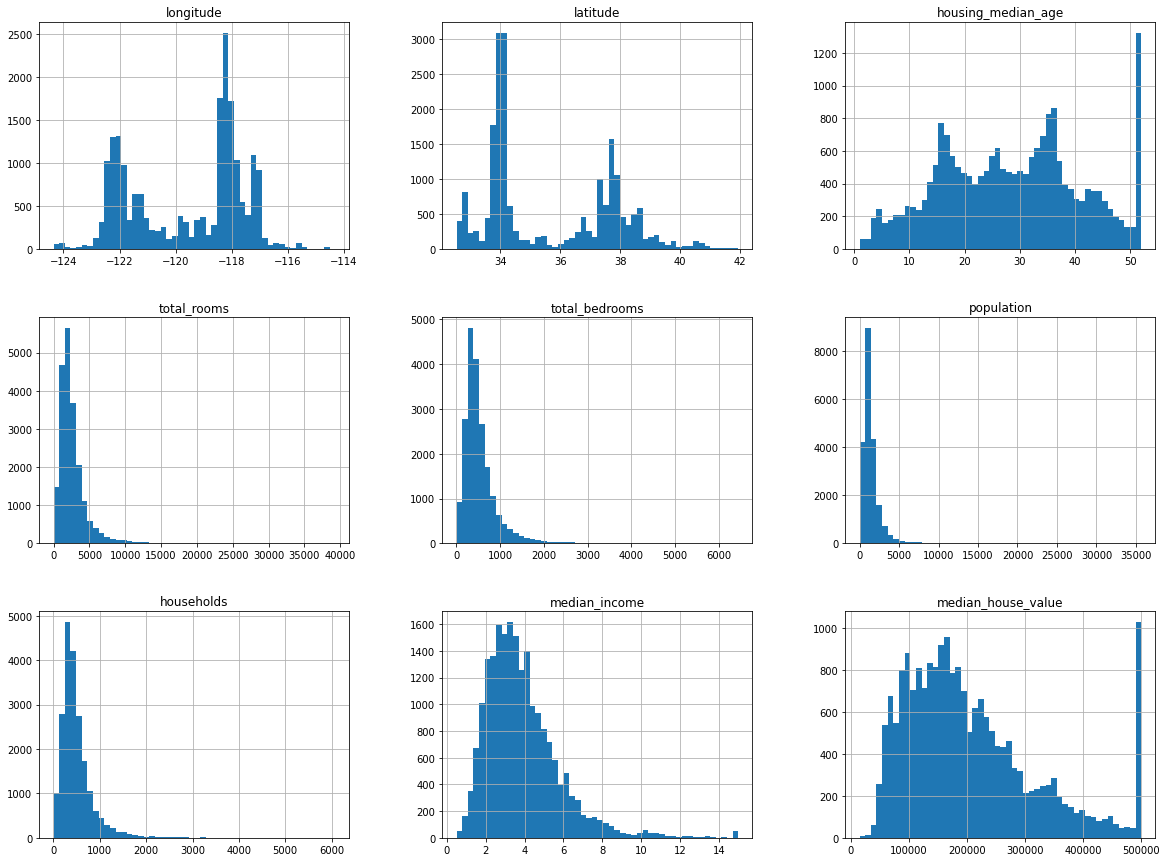

In [10]:
%matplotlib inline
housing.hist(bins=50, figsize=(20, 15))

Some notes about the data:
- Median income attributed is actually expressed in thousands of dollars.
- Median income, housing median age and median house value have been capped.
    - The latter is specially worrying as it is our target value. If we wanted to predict house values beyond 500000, we would have two options:
     1. Get data for capped districts
     2. Remove capped observations from the data altogether (hope that our model extrapolates well)
- Each attribute has very different scales
- Many features display tail-heavy distributions, which may worsen some ML algorithms' learning

## Strategies to Create Test Sets

### Strategy 1: Random Sample

In [11]:
import numpy as np
def split_train_test(data, test_ratio):
    nrows = data.shape[0]
    shuffled_indices = np.random.permutation(nrows)
    test_set_size = int(nrows*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

**Problem with this approach**
Every time you run it, you get different train and test sets, so your ML algorithm ends up seeing the entire dataset. Two possible workarounds:
- Save train/test sets
- Use a random seed

However, the problem persists when updating the dataset. A common solution is the Hashing Strategy

### Strategy 2: Hashing

Hash an id for each observation, put an observation into the test set if the hash is lower than or equal the 20 % maximum hash value.

Example of implementation:

In [12]:
# Cyclic redundancy check, basically maps Python objects other than integers to a 32-bit integer
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio* 2**32

In [13]:
def split_train_test_by_id(data, test_ratio, id_column):
    in_test_set = data[id_column].apply(lambda _id: test_set_check(_id, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [14]:
housing_with_id = housing.reset_index()  # add `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, .2, "index")

Check data split proportions:

In [15]:
len(test_set)/(len(train_set) + len(test_set)) * 100

20.0

It works like a charm!

The underlying assumption to provide stability in the division of observations is that all new data is appended at the end, and that no rows are ever deleted.

If there was another stable identifier in the database, we could use that instead to apply the split. In our example, we can use te longitude and the latitude:

In [16]:
housing_with_id["geo_id"] = housing["longitude"] + 1000* housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, .2, "geo_id")

In [17]:
len(test_set)/(len(train_set) + len(test_set)) * 100

19.113372093023255

In this case, since the geolocation information is a bit coarse, we introduce some sampling bias. A quick way to check that is by counting the values of geo_id:

In [18]:
housing_with_id["geo_id"].value_counts()

37677.59    15
37657.56    11
37677.58    11
37627.59    10
37637.53    10
            ..
32562.89     1
37747.50     1
33652.14     1
41416.08     1
33743.92     1
Name: geo_id, Length: 12590, dtype: int64

Where we notice that in effect, the new id does not perfectly identify each observation!

### Strategy 3: Stratifying

Imagine that the median income in a region is a key variable to predict house prices. We may want that our sampling represents the various categories of incomes in the dataset. To do that, we can create a number of categories in the sample with respect to median income and sample from each.

#### Step 1: Create median income categories

<AxesSubplot:>

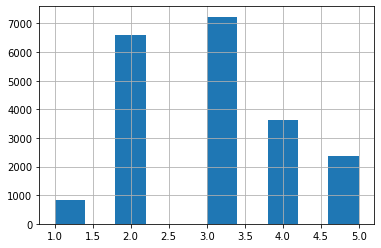

In [19]:
housing["income_cat"] = pd.cut(housing["median_income"], 
                               bins=[0., 1.5, 3., 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
housing["income_cat"].hist()

#### Step 2: Sample from each category separately

One easy solution is to use `sklearn.StratifiedShuffleSplit`

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=.2, random_state=42)
n_iters = 0
for train_index, test_index in split.split(housing, housing["income_cat"]):
    n_iters += 1
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
n_iters

1

The code above works because we only create a single train and test split from the full dataset, by specifying `n_splits` equal 1. We can quickly check that we haven't lost any observations...

In [21]:
len(strat_train_set) + len(strat_test_set) == len(housing)

True

Removing `income_cat` from original dataset:

In [22]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## Explore the Data

In [23]:
train_housing = strat_train_set.copy()

A cool trick: use transparency to be able to identify places of high-density of districts.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

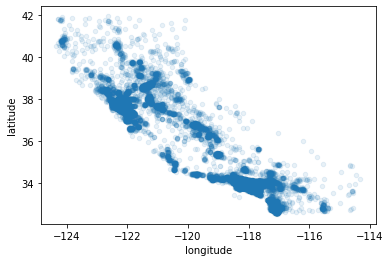

In [24]:
train_housing.plot(kind="scatter", x="longitude", y="latitude", alpha=.1)

Add two dimensions: district's population as size, and district's median price as colour. Notice that we divide size by 100, to avoid having the circles clutter the figure.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

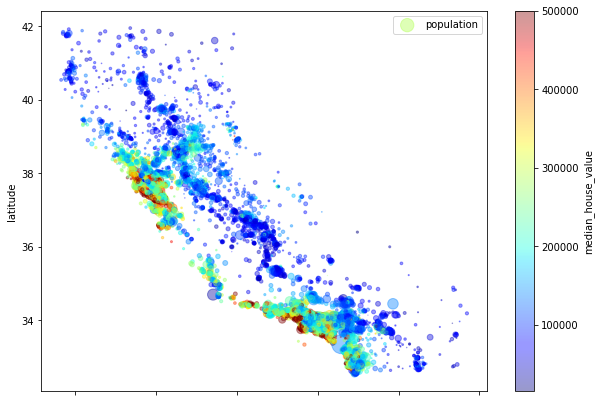

In [25]:
train_housing.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    alpha=.4,
    s=train_housing["population"]/100,
    label="population",
    figsize=(10, 7),
    c="median_house_value",
    cmap=plt.get_cmap("jet"),
    colorbar=True
)

We note that the proximity to high density cluster centers and to the coast are important factors to determine the median price. However, the proximity to the ocean rule does not apply to houses in Northern California. 

### Looking for Correlations

In [26]:
corr_matrix = train_housing.corr()

In particular, let's focus on the correlation w.r.t median house value:

In [27]:
corr_house_value = corr_matrix["median_house_value"].abs().sort_values(ascending=False)
corr_house_value

median_house_value    1.000000
median_income         0.687160
latitude              0.142724
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
longitude             0.047432
population            0.026920
Name: median_house_value, dtype: float64

Notice that I'm simply focusing on the absolute value...we don't care if the correlation is positive or negative. Let's take the most important four attributes according to the correlation measure:

In [28]:
four_most_relevant_features = list(corr_house_value.index[1:5])
four_most_relevant_features

['median_income', 'latitude', 'total_rooms', 'housing_median_age']

Let's use the pretty cool pandas function `scatter_matrix`, which plots every numerical attribute against every other numerical attribute.

array([[<AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='latitude', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_income', ylabel='latitude'>,
        <AxesSubplot:xlabel='latitude', ylabel='latitude'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='latitude'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='latitude'>],
       [<AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='latitude', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_income', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='latitude', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='total_rooms', yla

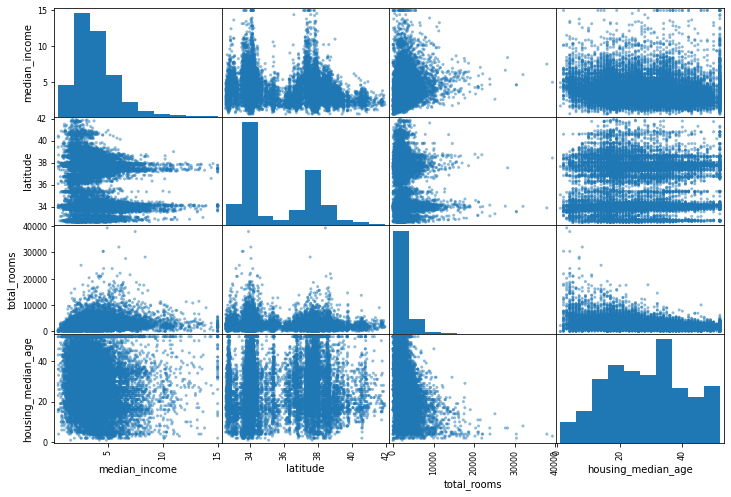

In [29]:
from pandas.plotting import scatter_matrix

scatter_matrix(train_housing[four_most_relevant_features], figsize=(12, 8))

Having the histogram is useful to compare how each other attribute transforms the original distribution. For example, in latitude VS median_income we observe that the districts with highest median income always lie in the latitude clusters.

We can also focus on the most promising feature -median_income- and plot it against the median house value:

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

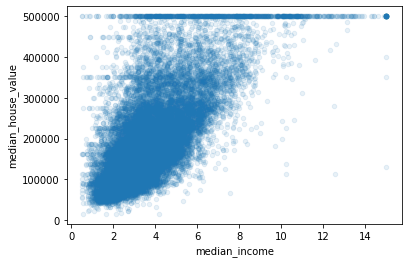

In [30]:
housing.plot(
    kind="scatter",
    x="median_income",
    y="median_house_value",
    alpha=.1
)

Two points to make from this graph:

1. The linear correlation is quite strong
2. There seems to be some sampling clustering around round values such as 350000, 450000, 500000...that break this relationship

### Experimenting Attribute Combinations

**Small exercise**. Create the following -presumptously more relevant- features:
1. Average number of rooms per household
2. Proportion of bedrooms to total rooms
3. Population per household

**Solution**. Let's start by having a look at the features available:

In [31]:
train_housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [32]:
train_housing["rooms_per_household"] = train_housing["total_rooms"]/train_housing["households"]
train_housing["proportion_bedrooms"] = train_housing["total_bedrooms"]/train_housing["total_rooms"]
train_housing["pop_per_household"] = train_housing["population"]/train_housing["households"]

And let's see how these new features score in terms of absolute correlations:

In [33]:
train_housing.corr()["median_house_value"].abs().sort_values(ascending=False)

median_house_value     1.000000
median_income          0.687160
proportion_bedrooms    0.259984
rooms_per_household    0.146285
latitude               0.142724
total_rooms            0.135097
housing_median_age     0.114110
households             0.064506
total_bedrooms         0.047689
longitude              0.047432
population             0.026920
pop_per_household      0.021985
Name: median_house_value, dtype: float64

We get a couple of good-scoring features: the proportion of bedrooms, and the rooms per household. Before trying to make sense of these relations, we should compute the actual correlation (negative, positive) of each of them.

In [34]:
train_housing.corr()["median_house_value"].sort_values(ascending=False)

median_house_value     1.000000
median_income          0.687160
rooms_per_household    0.146285
total_rooms            0.135097
housing_median_age     0.114110
households             0.064506
total_bedrooms         0.047689
pop_per_household     -0.021985
population            -0.026920
longitude             -0.047432
latitude              -0.142724
proportion_bedrooms   -0.259984
Name: median_house_value, dtype: float64

In [35]:
train_housing.drop(["rooms_per_household", "proportion_bedrooms", "pop_per_household"], axis=1, inplace=True)

In [36]:
train_housing.shape

(16512, 10)

## Prepare for Machine Learning Algorithms

First, we need to split the training set in features and labels

In [37]:
features = train_housing.drop("median_house_value", axis=1)
labels = train_housing["median_house_value"].copy()

### Data Cleaning

ML algorithms cannot work with missing features. Three possible solutions:

1. Get rid of the corresponding districts
2. Get rid of the whole attribute
3. Impute the values (zero, the mean, the median...)

In [38]:
# solution 1: get rid of rows with missing values
print(f"Number of original observations {len(features)}")
print(f"Number of observations without missing values {len(features.dropna(subset=['total_bedrooms']))}")

Number of original observations 16512
Number of observations without missing values 16354


In [39]:
# solution 2: drop whole attribute
features.drop(columns=["total_bedrooms"]).head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,4459.0,1463.0,3.0347,<1H OCEAN


In [40]:
# solution 3: impute values, e.g. median
median = features["total_bedrooms"].median()
features["total_bedrooms"].fillna(median).head()

17606     351.0
18632     108.0
14650     471.0
3230      371.0
3555     1525.0
Name: total_bedrooms, dtype: float64

In solution 3, the median value computed for the training should be stored and used to replace missing values in the test set when you want to evaluate your system or use it with live data.

Since we don't know which feature may appear missing in live data, we may want to keep imputed values for all attributes. Here is where `sklearn.SimpleImputer` may come handy. 

In [41]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

Since the median can only be imputed on numerical attributes, we need to work on a copy of the data without the text attribute `ocean_proximity`

In [42]:
housing_num = features.drop("ocean_proximity", axis=1)

Now let's fit the imputer, which only computes the median for each numerical attribute:

In [43]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [44]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

Now, let's replace the missing values in the numeric dataset:

In [45]:
X = imputer.transform(housing_num)
type(X)

numpy.ndarray

We got back a numpy array. To put it back on our dataframe, we can do the following:

In [46]:
# transform it back to a pd.DataFrame
housing_tr = pd.DataFrame(X, index=housing_num.index, columns=housing_num.columns)
# create dataframe with values to be imputed
features_copy = features.copy()
for col in housing_tr.columns:
    features_copy[col] = housing_tr[col]

In [47]:
# check the result
features.isna().any(), features_copy.isna().any()

(longitude             False
 latitude              False
 housing_median_age    False
 total_rooms           False
 total_bedrooms         True
 population            False
 households            False
 median_income         False
 ocean_proximity       False
 dtype: bool,
 longitude             False
 latitude              False
 housing_median_age    False
 total_rooms           False
 total_bedrooms        False
 population            False
 households            False
 median_income         False
 ocean_proximity       False
 dtype: bool)

In [48]:
# nobs should be the same
len(features), len(features_copy)

(16512, 16512)

### Handling Text and Categorical Attributes

In [49]:
features["ocean_proximity"].value_counts()

<1H OCEAN     7276
INLAND        5263
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: ocean_proximity, dtype: int64

We notice that there are five categories, where <1H OCEAN is the category where most districts lie.

ML algorithms only work with numeric attributes, so we need to transform this variable into numeric values. A simple solution is to use an `OrdinalEncoder`, available on `sklearn`.

In [50]:
from sklearn.preprocessing import OrdinalEncoder

housing_cat = features[["ocean_proximity"]]
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
ordinal_encoder.categories_, housing_cat.iloc[:10], housing_cat_encoded[:10]

([array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
        dtype=object)],
       ocean_proximity
 17606       <1H OCEAN
 18632       <1H OCEAN
 14650      NEAR OCEAN
 3230           INLAND
 3555        <1H OCEAN
 19480          INLAND
 8879        <1H OCEAN
 13685          INLAND
 4937        <1H OCEAN
 4861        <1H OCEAN,
 array([[0.],
        [0.],
        [4.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.]]))

The issue with ordinal representations is that ML algorithms will assume that two nearby values are more similar between each other. The common solution is to create binary variables, or *one-hot encoding* (as only attribute is hot (1), at a time)

In [51]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1_hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1_hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

Sparse matrices only store the location of 1s, thus saving a lot of memory. To convert it back into an array:

In [52]:
X = housing_cat_1_hot.toarray()

Again, we can get the list of categories by checking the encoder,

In [53]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Custom Transformers

Let's build a transformer such that it creates the variables that we added in the previous section (Experimenting Attributes Combinations). To create a Class that works seamlessly with sklearn Pipelines, we only need to create a class with 3 methods:

1. fit
2. tranform
3. fit_transform

We are going to employ a couple of tricks to do this:

1. Inheriting from TransformerMixin, we get `fit_transform` for free
2. With BaseEstimator plus no \*args and \*\*kwargs in the construction method, we obtain the `get_params` and `set_params` methods, that will prove useful later

In [54]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    # important! no *args or **kwargs!
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self  # nothing else to do
    
    def transform(self, X):
        columns_to_add = []
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        columns_to_add.extend([rooms_per_household, population_per_household])
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            columns_to_add.append(bedrooms_per_room)
        # transform into 2-D
        columns_to_add = [np.reshape(col, (-1, 1)) for col in columns_to_add]
        return np.concatenate([X, *columns_to_add], axis=1)

In [55]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(features.values)
housing_extra_attribs[:5]

array([[-121.89, 37.29, 38.0, 1568.0, 351.0, 710.0, 339.0, 2.7042,
        '<1H OCEAN', 4.625368731563422, 2.094395280235988],
       [-121.93, 37.05, 14.0, 679.0, 108.0, 306.0, 113.0, 6.4214,
        '<1H OCEAN', 6.008849557522124, 2.7079646017699117],
       [-117.2, 32.77, 31.0, 1952.0, 471.0, 936.0, 462.0, 2.8621,
        'NEAR OCEAN', 4.225108225108225, 2.0259740259740258],
       [-119.61, 36.31, 25.0, 1847.0, 371.0, 1460.0, 353.0, 1.8839,
        'INLAND', 5.232294617563739, 4.135977337110481],
       [-118.59, 34.23, 17.0, 6592.0, 1525.0, 4459.0, 1463.0, 3.0347,
        '<1H OCEAN', 4.50580997949419, 3.047846889952153]], dtype=object)

### Transformation Pipeline

We use sklearn Pipelines to define a sequence of transformations to be applied to the numerical features:

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

Here, we impute the values, then add additional attributes, and then scale the numerical attributes.

All but the last estimator must be transformers (i.e. having a fit_transform method). The names must be unique and avoid dunders, and will come handy later for hyperparameter tuning.

When we call the pipeline's `fit` method, the pipeline calls each transformer `fit_transform` sequentially for each but the last one, where it calls `fit`. If you use the `fit_transform` instead, then it simply calls `fit_transform` for all elements in the sequence.

In [57]:
housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr[:5]

array([[-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
        -0.63621141, -0.42069842, -0.61493744, -0.31205452, -0.08649871,
         0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , -0.90896655, -1.0369278 ,
        -0.99833135, -1.02222705,  1.33645936,  0.21768338, -0.03353391,
        -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, -0.31365989, -0.15334458,
        -0.43363936, -0.0933178 , -0.5320456 , -0.46531516, -0.09240499,
         0.4222004 ],
       [-0.01706767,  0.31357576, -0.29052016, -0.36276217, -0.39675594,
         0.03604096, -0.38343559, -1.04556555, -0.07966124,  0.08973561,
        -0.19645314],
       [ 0.49247384, -0.65929936, -0.92673619,  1.85619316,  2.41221109,
         2.72415407,  2.57097492, -0.44143679, -0.35783383, -0.00419445,
         0.2699277 ]])

Even cooler, `sklearn` now has a new class, the `ColumnTransformer`, that allows to transform numerical and categorical values simultaneously and is compatible with pandas DataFrames:

In [58]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = [feat for feat in features if feat not in num_attribs]
cat_attribs

['ocean_proximity']

In [59]:
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(features)
housing_prepared[:5], housing_prepared.shape

(array([[-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
         -0.63621141, -0.42069842, -0.61493744, -0.31205452, -0.08649871,
          0.15531753,  1.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [-1.17602483,  0.6596948 , -1.1653172 , -0.90896655, -1.0369278 ,
         -0.99833135, -1.02222705,  1.33645936,  0.21768338, -0.03353391,
         -0.83628902,  1.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 1.18684903, -1.34218285,  0.18664186, -0.31365989, -0.15334458,
         -0.43363936, -0.0933178 , -0.5320456 , -0.46531516, -0.09240499,
          0.4222004 ,  0.        ,  0.        ,  0.        ,  0.        ,
          1.        ],
        [-0.01706767,  0.31357576, -0.29052016, -0.36276217, -0.39675594,
          0.03604096, -0.38343559, -1.04556555, -0.07966124,  0.08973561,
         -0.19645314,  0.        ,  1.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.49247384

By default, non-selected columns will be dropped! However, you can change this default behaviour by specifying "pass through" to the remainder parameter of `ColumnTransformer`

## Select and Train a Model

### Quick Evaluation on the Training Set

The most reliable while simple way is to use Cross-Validation...that gives us already a measure of how well the model extrapolates.

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score

In [61]:
# checking that the number of observations in features and labels matches...
len(housing_prepared), len(labels)

(16512, 16512)

In [62]:
def display_scores(estimator, scores):
    print("Display scores for estimator ", estimator)
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())


def cross_val_rmse(estimator, feats, labels, nfolds=10):
    # notice how we invert the sign of scores, to make them be the mean_squared_error
    scores = cross_val_score(estimator, feats, labels, scoring="neg_mean_squared_error", cv=nfolds)
    display_scores(estimator, np.sqrt(-scores))

In [63]:
estimators = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(n_estimators=10)]

for estimator in estimators:
    cross_val_rmse(estimator, housing_prepared, labels)

Display scores for estimator  LinearRegression()
Scores:  [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean:  69052.46136345083
Standard deviation:  2731.674001798342
Display scores for estimator  DecisionTreeRegressor()
Scores:  [69289.53321819 66651.56475512 71916.26585753 69255.64367981
 70288.2629211  73806.25495297 71433.48581201 69650.96990193
 76985.90143755 69057.10516491]
Mean:  70833.49877011262
Standard deviation:  2746.5426673193906
Display scores for estimator  RandomForestRegressor(n_estimators=10)
Scores:  [51658.90186211 49546.23047111 52344.41215892 54232.85525554
 52958.62711015 57199.98958362 51254.19758482 50334.26463976
 55374.74660302 53146.62602366]
Mean:  52805.085129271516
Standard deviation:  2208.0170634719198


We see that the RandomForestRegressor dominates to the LinearRegression and DecisionTreeRegressor approaches. Probably, we would also like to have a measure of how well the model performs in the training set, to find out if the model is overfitting/underfitting the training data. For example, for the RandomForestRegressor we can find it in the following way:

In [64]:
rforest = RandomForestRegressor(n_estimators=10)
rforest.fit(housing_prepared, labels)
housing_predictions = rforest.predict(housing_prepared)
train_rforest_mse = mean_squared_error(labels, housing_predictions)
train_rforest_rmse = np.sqrt(train_rforest_mse)
train_rforest_rmse

22279.89891960635

Which is much lower than the rmse in the cross-validation exercise, meaning that the model is still overfitting the training data.

## Fine-Tune the model

In this section, we're just going to use Grid Search for explanation purposes.

In [65]:
from sklearn.model_selection import GridSearchCV

# each dictionary is evaluated separately
param_grid = [
    {
        "n_estimators": [3, 10, 30],
        "max_features": [2, 4, 6, 8]
    },
    {
        "bootstrap": [False],
        "n_estimators": [3, 10],
        "max_features": [2, 3, 4]
    }
]

rforest = RandomForestRegressor()
grid_search = GridSearchCV(rforest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(housing_prepared, labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

This code takes quite some time to run, since it's estimator the random forest 18 times over each of the 5 folds, i.e., 90 times.

We can check the best combination of parameters like this:

In [66]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

or the best estimator directly,

In [67]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

By default, GridSearch will reestimate the best model with all the training data. Let's get the evaluation scores.

In [68]:
cvres = grid_search.cv_results_
cvres.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_features', 'param_n_estimators', 'param_bootstrap', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [69]:
for mean_score, params in sorted(zip(cvres["mean_test_score"], cvres["params"]), key=lambda x: -x[0]):
    print(np.sqrt(-mean_score), params)

49630.05913830751 {'max_features': 8, 'n_estimators': 30}
49915.595752478 {'max_features': 6, 'n_estimators': 30}
50506.466917841964 {'max_features': 4, 'n_estimators': 30}
51794.843310863165 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}
51871.128239558326 {'max_features': 6, 'n_estimators': 10}
51910.11721186972 {'max_features': 8, 'n_estimators': 10}
52293.866804529185 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
52815.75997164284 {'max_features': 4, 'n_estimators': 10}
52922.2413161174 {'max_features': 2, 'n_estimators': 30}
54913.27463644986 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
55407.983464981946 {'max_features': 2, 'n_estimators': 10}
58449.67247223137 {'max_features': 6, 'n_estimators': 3}
58529.535480426144 {'max_features': 8, 'n_estimators': 3}
58878.75146937707 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
59484.28127591749 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
60999.074358144986 {'max_featur

The best model obtains a performance of 51136 in terms of mean square root error, something slightly better than that found in the previous section. With a high enough number of features, increasing the number of estimators seems like a good idea, so we could go a bit further in that direction.

### Best models and Errors

In [70]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
# getting categories from one hot encoder
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
attrs_importance = sorted(
    zip(grid_search.best_estimator_.feature_importances_, attributes), 
    reverse=True
)
attrs_importance

[(0.3733819802077773, 'median_income'),
 (0.1656760843888147, 'INLAND'),
 (0.1129143660117504, 'pop_per_hhold'),
 (0.06676191126407749, 'longitude'),
 (0.06250245001216757, 'bedrooms_per_room'),
 (0.060610281366845195, 'latitude'),
 (0.04385735467872101, 'rooms_per_hhold'),
 (0.041949591876665554, 'housing_median_age'),
 (0.015513644477249667, 'total_rooms'),
 (0.015346796980053345, 'population'),
 (0.015232817105681674, 'total_bedrooms'),
 (0.013887416728941986, 'households'),
 (0.007545436177135686, '<1H OCEAN'),
 (0.002874919556961509, 'NEAR OCEAN'),
 (0.0018892874368006086, 'NEAR BAY'),
 (5.566173035637157e-05, 'ISLAND')]

In [75]:
sorted_attrs = [attr_importance[1] for attr_importance in attrs_importance]
sorted_attrs[:5]

['median_income', 'INLAND', 'pop_per_hhold', 'longitude', 'bedrooms_per_room']

The median income and being inland seem to be the key features of our model.

## Evaluate on Test Set

In [71]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47975.309644770976

Maybe nicer to have a 95 % confidence interval:

In [72]:
from scipy import stats
confidence = .95
squared_errors = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                        loc=squared_errors.mean(), 
                        scale=stats.sem(squared_errors)))

array([45973.44683739, 49896.92231905])

Let's compare this vs. the median house price of the test set:

In [73]:
100*final_rmse/y_test.median()

26.461836538759503

A bit larger than 25 %, so not meeting initial business objectives -around 20 %. However, this would be the time to defend the model given the clear saving that it would imply in other resources, such as avoiding manual estimations.

## Exercise 3

Add a transformer to the preparation line to select the most important attributes. 

In [77]:
from sklearn.base import BaseEstimator, TransformerMixin


class MostImportantFeaturesSelector(BaseEstimator, TransformerMixin):
    def __init__(self, n_most_important=5):
        self.n_most_important = n_most_important
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        most_important_attributes = sorted_attrs[:self.n_most_important]
        most_important_attributes_indices = [attributes.index(attr) for attr in most_important_attributes]
        return X[:, most_important_attributes_indices]

In [85]:
pipeline_with_selection = Pipeline([
    ('full_pipeline', full_pipeline),
    ('selector', MostImportantFeaturesSelector())
])

In [91]:
pipeline_with_selection.fit_transform(features)

array([[-0.61493744,  0.        , -0.08649871, -1.15604281,  0.15531753],
       [ 1.33645936,  0.        , -0.03353391, -1.17602483, -0.83628902],
       [-0.5320456 ,  0.        , -0.09240499,  1.18684903,  0.4222004 ],
       ...,
       [-0.3167053 ,  1.        , -0.03055414,  1.58648943, -0.52177644],
       [ 0.09812139,  0.        ,  0.06150916,  0.78221312, -0.30340741],
       [-0.15779865,  0.        , -0.09586294, -1.43579109,  0.10180567]])

## Exercise 4

Create a single pipeline that does the full data preparation plus the final prediction.

In [123]:
class RandomForestPredictor(BaseEstimator, TransformerMixin):
    def __init__(self, n_estimators=10):
        self.n_estimators = n_estimators
        self.rforest = RandomForestRegressor(n_estimators=self.n_estimators)
        
    def fit(self, X, y):
        self.rforest.fit(X, y)
        return self
    
    def transform(self, X):
        return self.rforest.predict(X)
    
    def predict(self, X):
        return self.rforest.predict(X)

In [124]:
pipeline_with_estimation = Pipeline([
    ('full_pipeline', full_pipeline),
    ('rforest_estimator', RandomForestPredictor(n_estimators=10))
])

In [125]:
pipeline_with_estimation.fit(features, labels)

Pipeline(steps=[('full_pipeline',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                  

In [126]:
new_final_predictions = pipeline_with_estimation.transform(X_test)

In [127]:
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47975.309644770976

## Exercise 5

Automate the preparation parameters with GridSearchCV.

In [140]:
param_grid = [
    {
        "rforest_estimator__n_estimators": [3, 10, 30],
        "full_pipeline__num__attribs_adder__add_bedrooms_per_room": [False]
    },
    {
        "rforest_estimator__n_estimators": [3, 10, 30],
        "full_pipeline__num__attribs_adder__add_bedrooms_per_room": [True]
    }
]

grid_search = GridSearchCV(pipeline_with_estimation, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)

In [141]:
pipeline_with_estimation.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'full_pipeline', 'rforest_estimator', 'full_pipeline__n_jobs', 'full_pipeline__remainder', 'full_pipeline__sparse_threshold', 'full_pipeline__transformer_weights', 'full_pipeline__transformers', 'full_pipeline__verbose', 'full_pipeline__num', 'full_pipeline__cat', 'full_pipeline__num__memory', 'full_pipeline__num__steps', 'full_pipeline__num__verbose', 'full_pipeline__num__imputer', 'full_pipeline__num__attribs_adder', 'full_pipeline__num__std_scaler', 'full_pipeline__num__imputer__add_indicator', 'full_pipeline__num__imputer__copy', 'full_pipeline__num__imputer__fill_value', 'full_pipeline__num__imputer__missing_values', 'full_pipeline__num__imputer__strategy', 'full_pipeline__num__imputer__verbose', 'full_pipeline__num__attribs_adder__add_bedrooms_per_room', 'full_pipeline__num__std_scaler__copy', 'full_pipeline__num__std_scaler__with_mean', 'full_pipeline__num__std_scaler__with_std', 'full_pipeline__cat__categories', 'full_pipeline__cat__drop

In [142]:
grid_search.fit(features, labels)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('full_pipeline',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('attribs_adder',
                                                                                          CombinedAttributesAdder()),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['longitude',
                                                                          'latitude',
     

In [143]:
grid_search.best_params_

{'full_pipeline__num__attribs_adder__add_bedrooms_per_room': True,
 'rforest_estimator__n_estimators': 10}

In [145]:
cvres = grid_search.cv_results_

for mean_score, params in sorted(zip(cvres["mean_test_score"], cvres["params"]), reverse=True):
    print(np.sqrt(-mean_score), params)

52785.323624824814 {'full_pipeline__num__attribs_adder__add_bedrooms_per_room': True, 'rforest_estimator__n_estimators': 10}
53055.83569003726 {'full_pipeline__num__attribs_adder__add_bedrooms_per_room': False, 'rforest_estimator__n_estimators': 10}
53089.94744479118 {'full_pipeline__num__attribs_adder__add_bedrooms_per_room': True, 'rforest_estimator__n_estimators': 3}
53246.185013038514 {'full_pipeline__num__attribs_adder__add_bedrooms_per_room': False, 'rforest_estimator__n_estimators': 30}
53251.5118442265 {'full_pipeline__num__attribs_adder__add_bedrooms_per_room': True, 'rforest_estimator__n_estimators': 30}
53286.37538584991 {'full_pipeline__num__attribs_adder__add_bedrooms_per_room': False, 'rforest_estimator__n_estimators': 3}


The results we've got are are worse since we haven't optimised the `max_features` parameter.